# Snipers vs Thieves Challenge
Author: Jan Erish Baluca

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats.kde import gaussian_kde
from scipy.stats import mode
from numpy import linspace

In [3]:
adClosed = pd.read_csv('SvT/adClosed.csv').dropna()
clientDevice = pd.read_csv('SvT/clientDevice.csv')
newPlayer = pd.read_csv('SvT/newPlayer.csv')
roundEnd = pd.read_csv('SvT/roundEnd.csv')
transaction = pd.read_csv('SvT/transaction.csv')

In [4]:
print(transaction.columns)
print(transaction.head(5))

Index(['eventTimeStamp', 'transactionID', 'platform', 'playerid', 'productID',
       'sessionID', 'itemAmount', 'itemName', 'itemType', 'realCurrencyAmount',
       'realCurrencyType', 'realCurrencyAmountConvertedUSD',
       'virtualCurrencyAmount', 'virtualCurrencyName', 'virtualCurrencyType',
       'productAmount', 'productCategory', 'productName', 'productType',
       'transactionType', 'transactionVector'],
      dtype='object')
        eventTimeStamp              transactionID        platform  playerid  \
0  2018-04-05 22:41:47  2,448,697,962,899,587,072  ANDROID_MOBILE  25718420   
1  2018-04-05 22:41:47  2,448,697,962,899,587,072  ANDROID_MOBILE  25718420   
2  2018-04-05 19:08:06  2,448,710,633,669,677,056      IOS_TABLET  24756792   
3  2018-04-05 19:08:06  2,448,710,633,669,677,056      IOS_TABLET  24756792   
4  2018-04-05 12:43:21  2,448,691,388,121,587,712      IOS_MOBILE  25505588   

      productID                             sessionID itemAmount  itemName  \
0     

In [5]:
adClosed.head(5)
adStatuses = list(adClosed.adStatus.unique())
adStatuses

['Success', 'Expired', 'Not Ready', 'Error']

In [6]:
newPlayer.head(5)

,eventTimeStamp,userID,userCountry,platform,sessionID
0,2018-04-04 16:47:15,2ac0b1d3-f215-4a44-a8a4-d61a5162c471,BR,ANDROID_MOBILE,a5722b89-850d-4d5f-a984-2654e597365d
1,2018-04-04 06:29:12,2c9d50b5-06c4-44df-b9cd-9c241eebb0b3,RU,ANDROID_TABLET,350e24cf-cb83-472f-b290-c1c200775dae
2,2018-04-04 13:34:39,2fd05f3a-98ae-4ba7-adb4-2045f3d82dfb,RU,ANDROID_MOBILE,f9ca098d-4eed-48a7-9a74-7aa1991817cb
3,2018-04-04 07:25:37,34e742f8-1802-46b3-8493-ec8df03aa7c5,HR,ANDROID_MOBILE,367683ca-724d-4238-8ad2-75a0cdbc7345
4,2018-04-04 13:06:50,372bead5-5fb8-4a87-a1e6-20382e4bf6ec,IN,ANDROID_MOBILE,86d944e3-3479-4fe4-b8e0-994950da7265


In [7]:
count_nan = len(clientDevice) - clientDevice.count()
print(count_nan)
print(pd.DataFrame(clientDevice.deviceName.unique()))
print(clientDevice.platform.unique())
clientDevice.head(5)
#clientDevice.userID.values_counts()

eventTimeSTamp                 0
platform                       0
deviceName                     0
manufacturer              196830
sessionID                      0
userID                         0
userLanguage                   0
operatingSystemVersion         0
dtype: int64
                                    0
0                   samsung SM-T113NU
1                    samsung SM-J200M
2                        iPad Mini 2G
3                    samsung SM-J730F
4                    samsung SM-G610F
5                           Meizu M5s
6                        ZUUM Gravity
7                           OPPO A37f
8                         LGE LG-K120
9                           iPhone 5C
10                 ZTE ZTE Blade A462
11                  samsung SM-T530NU
12                    samsung SM-T280
13                           iPhone 6
14                   samsung SM-N9005
15                          iPhone SE
16                     Google Pixel 2
17                    samsung SM-T230
1

,eventTimeSTamp,platform,deviceName,manufacturer,sessionID,userID,userLanguage,operatingSystemVersion
0,2018-04-04 02:34:15,ANDROID_TABLET,samsung SM-T113NU,samsung,a047fedc-58d5-4449-9bbc-55f348ec6292,01a2a1a8-42c9-49d9-981b-b0d608e76fd3,es,4.4.4
1,2018-04-04 01:02:15,ANDROID_MOBILE,samsung SM-J200M,samsung,678176d0-eaf5-48c1-9721-aab193f52302,4a997fbb-0957-4317-ad52-146a0c6bc576,es,5.1.1
2,2018-04-04 01:05:51,ANDROID_MOBILE,samsung SM-J200M,samsung,5620bae1-2de8-40dd-93e6-7644106bdade,4a997fbb-0957-4317-ad52-146a0c6bc576,es,5.1.1
3,2018-04-04 01:08:53,ANDROID_MOBILE,samsung SM-J200M,samsung,afcc4e2d-cc86-4631-9d6d-6afa69a9d18d,4a997fbb-0957-4317-ad52-146a0c6bc576,es,5.1.1
4,2018-04-04 00:54:41,IOS_TABLET,iPad Mini 2G,NaN,10fb7a45-2e8a-47f6-b372-b0cad8627629,56810990-056f-4a10-8fca-beda4dbd44ba,en,10.3.3


In [8]:
df = pd.DataFrame()
#clientDevice['size'] = clientDevice.groupby('userID')['userID'].transform('size')
#clientDevice.groupby(['userID','sessionID', 'platform']).count()

In [9]:
print(roundEnd.head(5))
print(roundEnd.missionName.unique())
missionIDs = np.count_nonzero(list(roundEnd.sessionID.unique()))
missionIDs

        eventTimeStamp            missionID        platform  playerid  \
0  2018-04-04 04:12:25  21247223:1522815039      IOS_TABLET  20180043   
1  2018-04-04 09:36:53  25643928:1522834577  ANDROID_MOBILE    814110   
2  2018-04-04 20:31:36  25712811:1522873813  ANDROID_MOBILE  25712811   
3  2018-04-04 01:53:34   4253548:1522806725  ANDROID_MOBILE   4253548   
4  2018-04-05 01:54:34  25720602:1522893196      IOS_MOBILE  25720602   

                              sessionID       missionName  bulletHits  \
0  a6e49a98-f1fc-4c16-8985-224d3504aa04    City_Street_02          16   
1  1758b446-5111-4703-9f9a-ed67ceca175a       HillVillage           0   
2  cf182f3d-e8e0-4e2b-a2c4-ea8624d259a0    City_Street_02           4   
3  c60f8fb4-61ff-4add-80b2-285c9b08fe91       HillVillage           8   
4  e833f32e-2f63-436e-8847-120f4854b8c3  ContainerHarbour           4   

  playerRole endstate  numAI    ...     scoreKills  seasonsPlayed  userBag  \
0     Sniper        0      4    ...         

203351

# Possible analyses points:
* Cohort analyses on players that started around the same time
* 

## Cohort Analysis


#### identify which points in the game are profitable and which points make players stop playing

#### Identify clusters of users who tend to purchase more
* device type (check correlation)
* players who play more thief than sniper maybe (?) (whether difference between count of role as sniper and count of role as thief is positive or negative

bin the users based on:
    * the number of purchases they have made in their lifetime
    * their rate of purchasing (count)
    * their average purchase amount per day

### Questions to answer:  
* Does the phone that a player uses affect performance as sniper? Are players on high end devices dominating?
* In future we can only use one ad provider in game to supply our adverts. Which one should we go with? 
* What part of the tutorial should we improve? Are players struggling at any part and leaving the game?


### Possible additional question to answer:  
* Game balancing
* Monetisation
* Retention
* Player segmentation
* Game economy - in game currency sources and sinks
* Matchmaking - snipers, thieves and AI players
* Predictive modelling


# Performance and purchases *time series perhaps?*
* relationship between player's prior performance and probability of making purchases
    * maybe also identify the types of purchases made
    
* scores resampled as average per month vs. transactions resampled as total per month?


multi-index: userid -> 	event day

# In future we can only use one ad provider in game to supply our adverts. Which one should we go with? 

Simply providing the count of successful ads per ad provider hides the real performance of an ad provider. It is important to compare the successful ads to the ones that failed.

In [10]:
# ratio between success and other results
adClosed_pivot = adClosed.pivot_table(index='adProvider',columns ='adStatus',values='eventTimeStamp',
                                      aggfunc='count').fillna(0).astype('int')
adClosed_pivot

adStatus,Error,Expired,Not Ready,Success
adProvider,,,,
ADCOLONY,0,2608,0,23764
IRONSOURCE,20,0,49,30528
UNITY,85,0,59,51873
VUNGLE,6,0,9,36223


In [11]:
adClosed_pivot['Failure'] = adClosed_pivot['Error'] + adClosed_pivot['Expired'] + adClosed_pivot['Not Ready']
adClosed_pivot['Success/Fail Ratio'] = np.round(adClosed_pivot.Success / adClosed_pivot.Failure, 2)
adClosed_pivot= adClosed_pivot.drop(['Error','Expired','Not Ready'], axis=1)
adClosed_pivot

adStatus,Success,Failure,Success/Fail Ratio
adProvider,,,
ADCOLONY,23764,2608,9.11
IRONSOURCE,30528,69,442.43
UNITY,51873,144,360.23
VUNGLE,36223,15,2414.87


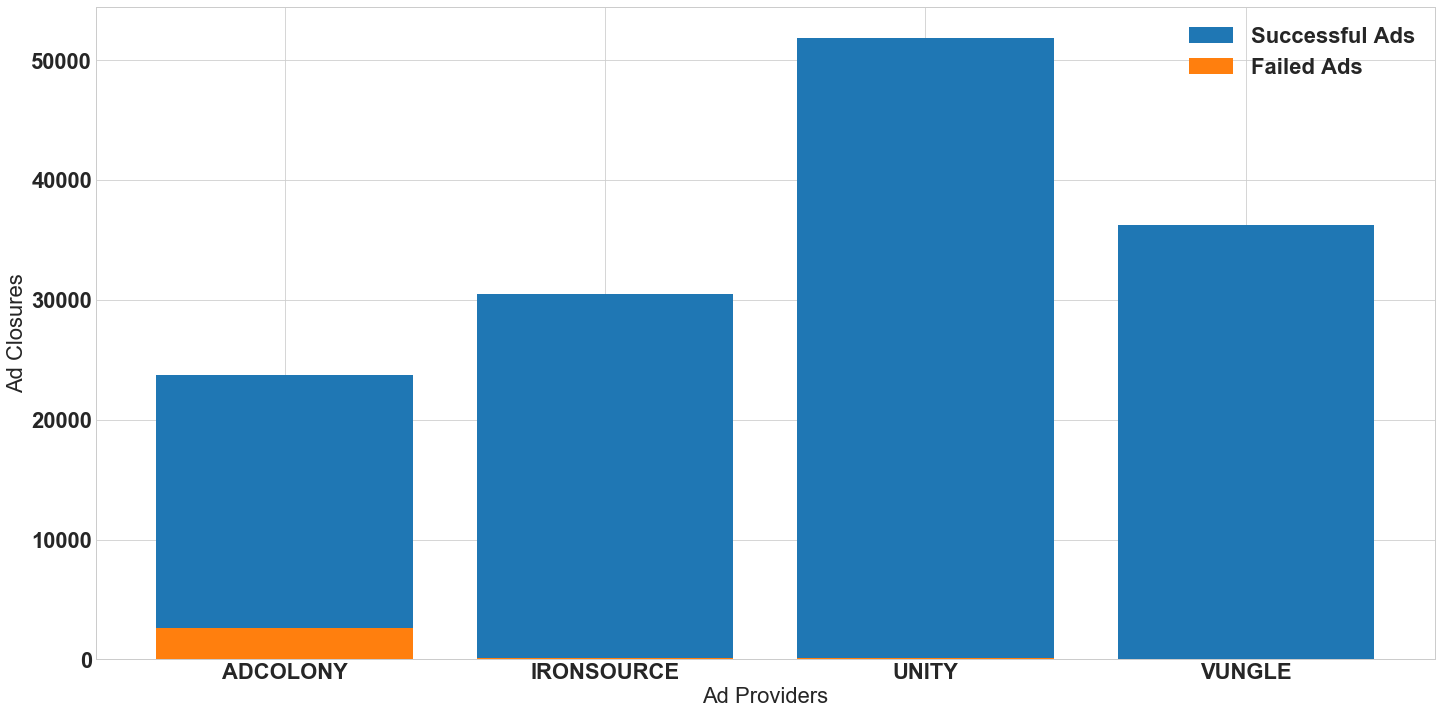

In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.figure(figsize=(24,12))
sns.set_style("whitegrid")
r = [0, 1, 2, 3]
plt.bar(r, adClosed_pivot.Success, label='Successful Ads')
plt.bar(r, adClosed_pivot.Failure, label='Failed Ads')
plt.xticks(r,list(adClosed_pivot.index.tolist()))
plt.xlabel('Ad Providers')
plt.ylabel('Ad Closures')
plt.legend(loc='upper right')
plt.show()

# Does the phone that a player uses affect performance as sniper? Are players on high end devices dominating?

In [13]:
# define a function for creating ecdf values
def ecdf(input):
    x = np.sort(input)
    y = np.arange(1, len(x)+1) / len(x)
    
    return x, y

# define a function for creating a pdf
def pdf(x):
    return np.exp(-x ** 2)


# prepare legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Circle((1,2),color='dodgerblue', label='iOS')
orange_patch = mpatches.Circle((1,2),color='coral', label='Android')

In [14]:
roundEnd2 = roundEnd.drop('userCountry',axis=1).dropna()
sniperPerformance = pd.DataFrame(roundEnd2.loc[roundEnd2['playerRole'] == 'Sniper',['platform','scoreKills']])
snipe = pd.DataFrame()
snipe['platform'] = ['iOS_MOBILE','iOS_TABLET','Android_MOBILE', 'Android_TABLET']
snipe.set_index('platform',inplace=True)
snipe['mean_score'] = [np.mean(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values),
                       np.mean(sniperPerformance.loc[sniperPerformance.platform=='IOS_TABLET','scoreKills'].values),
                      np.mean(sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE','scoreKills'].values),
                      np.mean(sniperPerformance.loc[sniperPerformance.platform=='ANDROID_TABLET','scoreKills'].values)]
snipe['mode_score'] = [mode(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values),
                       mode(sniperPerformance.loc[sniperPerformance.platform=='IOS_TABLET','scoreKills'].values),
                      mode(sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE','scoreKills'].values),
                      mode(sniperPerformance.loc[sniperPerformance.platform=='ANDROID_TABLET','scoreKills'].values)]
snipe

,mean_score,mode_score
platform,,
iOS_MOBILE,2.828989,"([4.0], [57405])"
iOS_TABLET,2.682946,"([4.0], [15164])"
Android_MOBILE,2.530447,"([4.0], [81464])"
Android_TABLET,2.209044,"([4.0], [11306])"


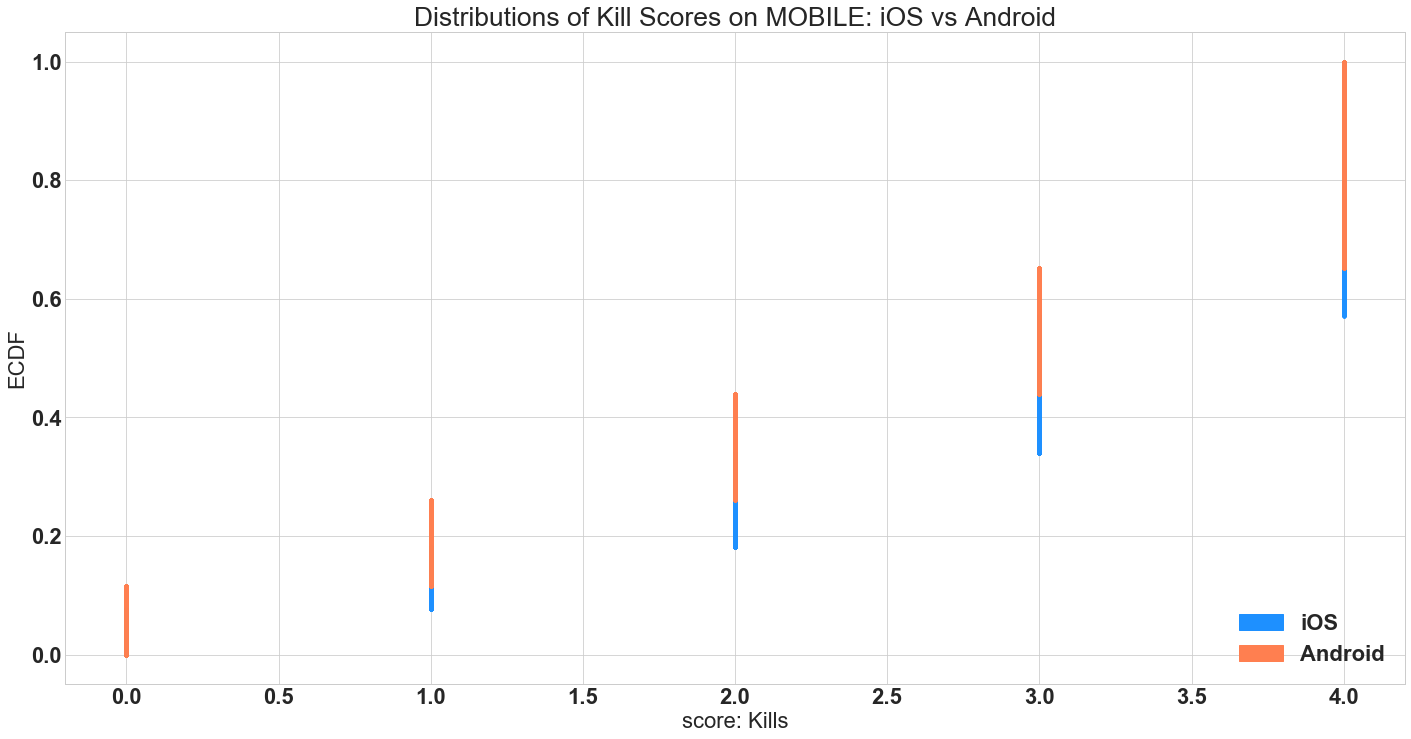

In [15]:
ios_mobile_X, ios_mobile_y = ecdf(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values)
android_mobile_X, android_mobile_y = ecdf(sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE',
                                                                'scoreKills'].values)


plt.figure(figsize=(24,12))
_ = plt.plot(ios_mobile_X, ios_mobile_y, marker='.', linestyle='none', color='dodgerblue', alpha=0.5)
_ = plt.plot(android_mobile_X, android_mobile_y, marker='.', linestyle='none', color='coral', alpha=0.5)
plt.xlabel('score: Kills')
plt.ylabel('ECDF')
plt.title('Distributions of Kill Scores on MOBILE: iOS vs Android')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()


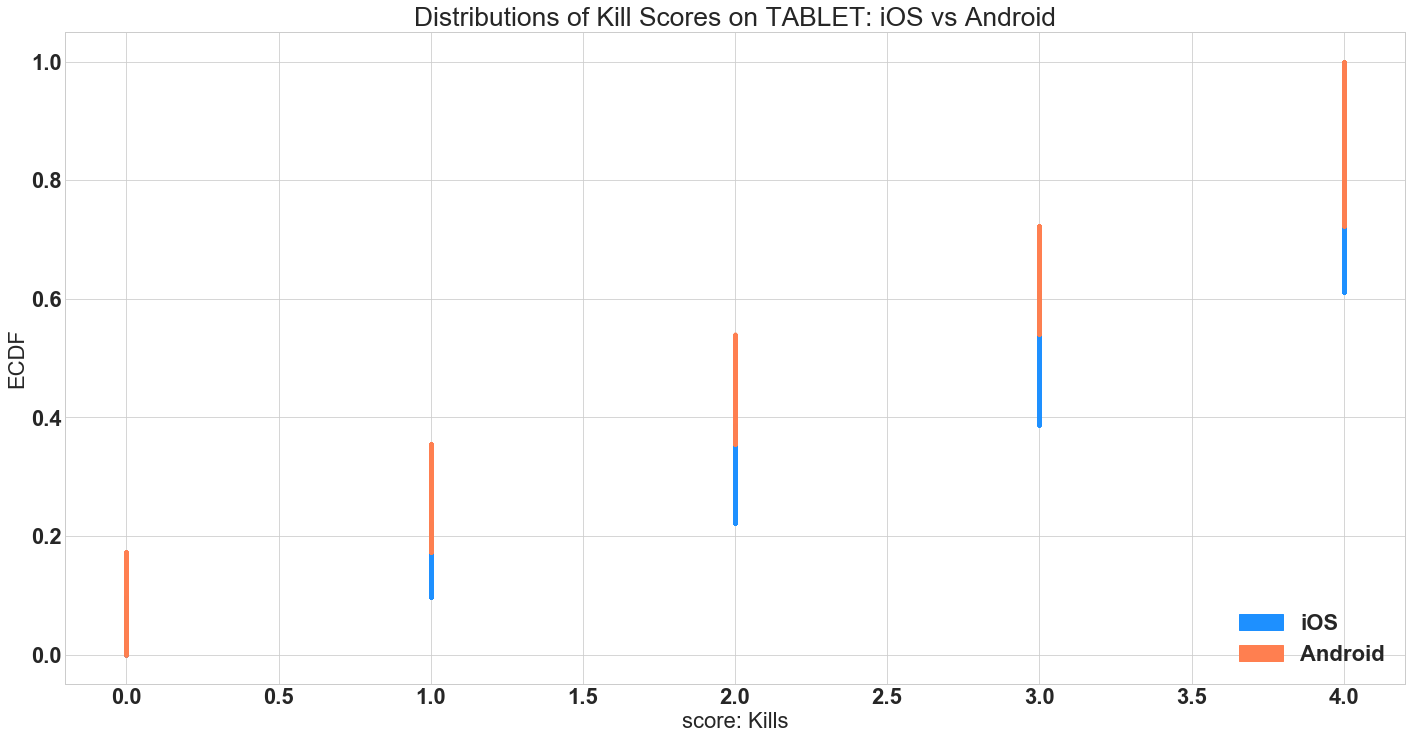

In [16]:
ios_tablet_X, ios_tablet_y = ecdf(sniperPerformance.loc[sniperPerformance.platform=='IOS_TABLET','scoreKills'].values)
android_tablet_X, android_tablet_y = ecdf(sniperPerformance.loc[sniperPerformance.platform=='ANDROID_TABLET',
                                                                'scoreKills'].values)


plt.figure(figsize=(24,12))
_ = plt.plot(ios_tablet_X, ios_tablet_y, marker='.', linestyle='none', color='dodgerblue', alpha=0.5)
_ = plt.plot(android_tablet_X, android_tablet_y, marker='.', linestyle='none', color='coral', alpha=0.5)
plt.xlabel('score: Kills')
plt.ylabel('ECDF')
plt.title('Distributions of Kill Scores on TABLET: iOS vs Android')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()


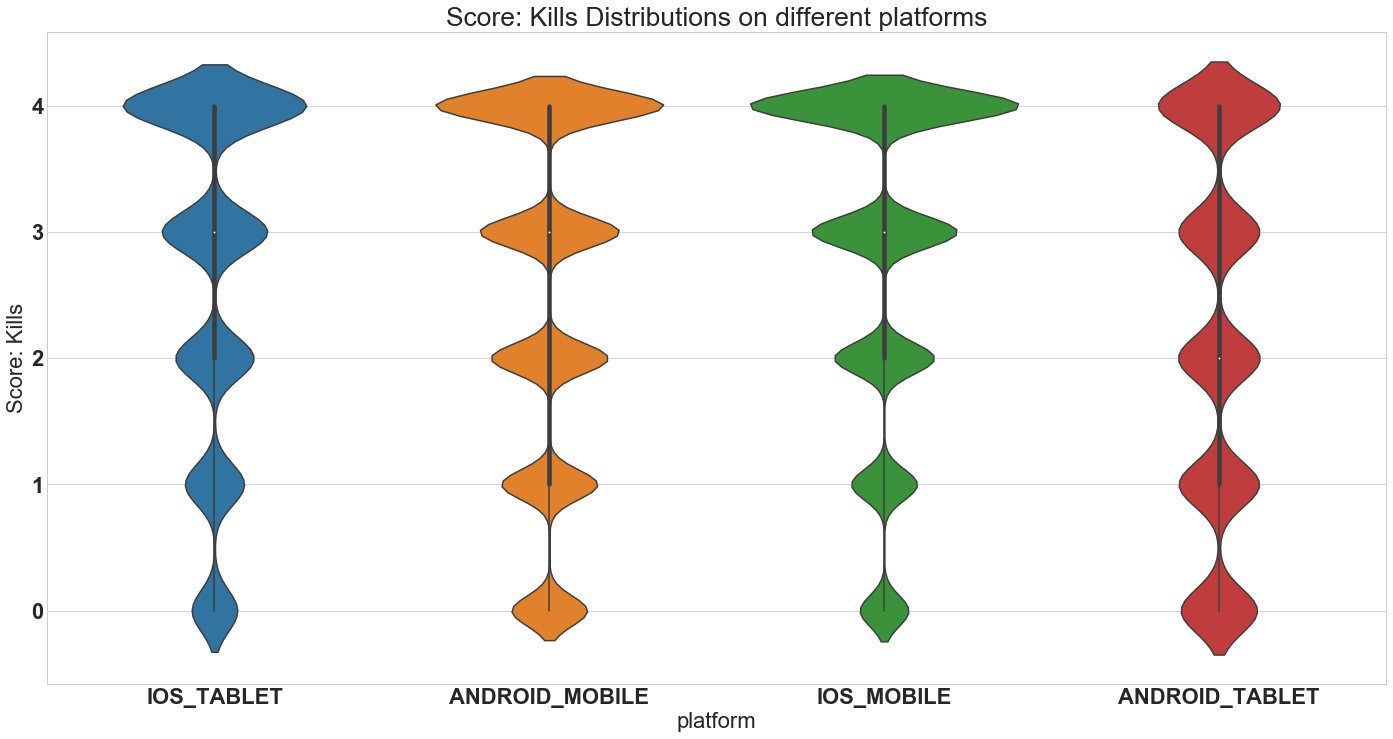

In [17]:
# Swarmplot: Unemlpoyment Rate Distribution
plt.figure(figsize=(24,12))
swarm = sns.violinplot(x='platform',y='scoreKills', data=sniperPerformance)
swarm = plt.xlabel('platform')
swarm = plt.ylabel('Score: Kills')
swarm = plt.title('Score: Kills Distributions on different platforms')
plt.show()

# Hacker Statistics

In [18]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define the test statistic function: difference of means
def difference_of_means(d1, d2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    difference = np.mean(d1) - np.mean(d2)

    return difference

# Define function for generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    
    return perm_replicates

def bootstrap_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate data
    data_concat = np.concatenate((data1, data2))

    # Bootstrap the concatenated array
    bootstrapped_data = np.random.choice(data_concat, size=len(data_concat))

    # Split the permuted array into two
    bs_sample_1 = bootstrapped_data[:len(data1)]
    bs_sample_2 = bootstrapped_data[len(data1):]

    return bs_sample_1, bs_sample_2

# Defining the function for drawing bootstrap replicates
def draw_bs_replicates(data_1, data_2, func, size=1):

    
    # Initialize bootstrap replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    for i in range(size):
        # Generate Bootstrap sample
        bs_sample_1, bs_sample_2 = bootstrap_sample(data_1, data_2)
        
        # Compute replicate
        bs_replicates[i] = func(bs_sample_1, bs_sample_2)
    
    return bs_replicates

## Permutation Test

In [19]:
# Compute difference of mean kill score
empirical_diff_means = difference_of_means(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values,
                                    sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE','scoreKills'].values)
print("Observed Test Statistic - Difference of Means: {}".format(empirical_diff_means))

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values,
                                    sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE','scoreKills'].values,
                                    difference_of_means, size=1000)
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)


# Print
print('Kill Score Distribution Permutation Test: p-value = {}'.format(p))

Observed Test Statistic - Difference of Means: 0.29854200319799684
Kill Score Distribution Permutation Test: p-value = 0.0


In [20]:
# Compute difference of mean kill score
empirical_diff_means = difference_of_means(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values,
                                    sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE','scoreKills'].values)
print("Observed Test Statistic - Difference of Means: {}".format(empirical_diff_means))

# Draw bootstrap replicates
bs_replicates = draw_bs_replicates(sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values,
                                    sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE','scoreKills'].values,
                                      difference_of_means, size=1000)
        
# Compute and print p-value: p
p = np.sum(empirical_diff_means <= bs_replicates) / len(bs_replicates)

print('Kill Score Distribution Bootstrap Test: p-value = {}'.format(p))


Observed Test Statistic - Difference of Means: 0.29854200319799684
Kill Score Distribution Bootstrap Test: p-value = 0.0


In [21]:
# If including performance of Thieves as well

# create a variable for measuring performance
performance_Metric = []

# scale the two scores first!
roundEnd2[['scoreKills', 'scoreEscapes']] = StandardScaler().fit_transform(roundEnd2[['scoreKills', 'scoreEscapes']])

# iterator
for index, row in roundEnd2.iterrows():
    if row.playerRole == 'Sniper':
        performance_Metric.append(row['scoreKills'])
    elif row.playerRole == 'Thief':
        performance_Metric.append(row['scoreEscapes'])

roundEnd2['performance_Metric'] = performance_Metric
pd.DataFrame(roundEnd2['performance_Metric']).head(5)

,performance_Metric
0,1.782269
1,-1.254259
2,0.523695
3,0.088469
4,-0.105592


In [22]:
#pd.DataFrame(roundEnd2.loc[roundEnd2.numAI == 4,:]\
#             .loc[roundEnd2.userLevel == 1,:]).sort_values(by=['playerid','eventTimeStamp']).to_excel('sorted player.xlsx')


In [26]:
sortdf = pd.DataFrame(roundEnd2.sort_values(by=['playerid', 'eventTimeStamp']))
#sortdf.to_excel('sorted.xlsx')
sortdf.head(20)
#sortdf.loc[roundEnd2.playerid == 28331, :].to_excel('sorted player.xlsx')
#print(sortdf.loc[roundEnd2.playerid == 28331, :])

,eventTimeStamp,missionID,platform,playerid,sessionID,missionName,bulletHits,playerRole,endstate,numAI,...,scoreKills,seasonsPlayed,userBag,userCash,userGold,userLevel,userMask,userRank,userRifle,performance_Metric
882744,2018-04-05 15:42:17,25723999:1522942840,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,HillVillage,9,Thief,0,2,...,-0.734878,3.0,bg_3,"82,845",23,7.0,mask_138,13.0,r_1,0.088469
882745,2018-04-05 15:45:01,11670438:1522943041,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,HillVillage,3,Thief,0,3,...,-0.734878,3.0,bg_3,"82,845",23,7.0,mask_86,13.0,r_1,-1.254259
882746,2018-04-05 15:48:28,25747162:1522943184,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,City_Street_02,9,Thief,0,2,...,-0.734878,3.0,bg_3,"82,845",23,7.0,mask_86,13.0,r_1,0.088469
882747,2018-04-05 15:51:52,25662807:1522943394,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,Village,8,Thief,0,2,...,-0.734878,3.0,bg_3,"82,845",23,8.0,mask_86,13.0,r_1,-0.582895
882748,2018-04-05 15:53:56,25717451:1522943552,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,Indu_TrainYard_01,2,Thief,0,1,...,-0.734878,3.0,bg_3,"82,845",23,8.0,mask_86,13.0,r_1,-1.254259
882749,2018-04-05 15:56:01,25703864:1522943708,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,City_Street_01,2,Thief,0,1,...,-0.734878,3.0,bg_3,"48,845",23,9.0,mask_86,13.0,r_1,-1.254259
882750,2018-04-05 15:59:21,23713139:1522943841,ANDROID_MOBILE,2686,e9026122-c996-4bc3-afc8-942c93b9c3dc,GumiTown,8,Thief,"1,660",2,...,-0.734878,3.0,bg_3,"18,845",23,10.0,mask_86,13.0,r_1,1.431197
882751,2018-04-05 18:16:22,21804444:1522952052,ANDROID_MOBILE,2686,cbe9173b-f783-4ed6-be97-7c02d328f523,City_Chinatown_01,5,Thief,"1,820",3,...,-0.734878,3.0,bg_3,"5,505",27,10.0,mask_86,12.0,r_1,0.759833
660803,2018-04-05 20:56:04,4297:1522961658,IOS_TABLET,4297,c39dcc1d-a5ef-4f9e-ac96-f4e7ee48b7fc,City_Street_01,4,Thief,"9,480",4,...,-0.734878,20.0,bg_14,"4,864,010","1,021",31.0,mask_173,11.0,r_t06_03,1.431197
733443,2018-04-05 20:56:04,4297:1522961658,IOS_TABLET,4297,c39dcc1d-a5ef-4f9e-ac96-f4e7ee48b7fc,City_Street_01,4,Thief,"9,480",4,...,-0.734878,20.0,bg_14,"4,864,010","1,021",31.0,mask_173,11.0,r_t06_03,1.431197


ios_mobile= sniperPerformance.loc[sniperPerformance.platform=='IOS_MOBILE','scoreKills'].values
android_mobile = sniperPerformance.loc[sniperPerformance.platform=='ANDROID_MOBILE',
                                                               'scoreKills'].values

ios_mobile_kde = gaussian_kde(ios_mobile)
android_mobile_kde = gaussian_kde(android_mobile)

# these are the values over wich your kernel will be evaluated
dist_space = linspace( 0, 4, 1 )
        
plt.figure(figsize=(24,12))
__ = plt.plot(dist_space,
             ios_mobile_kde(dist_space), color='dodgerblue', alpha=0.5)
__ = plt.plot(dist_space,
             android_mobile_kde(dist_space), color='coral', alpha=0.5)
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()